# import

In [1]:
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
import PIL
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
import pytorch_lightning as pl
from torchmetrics.functional import accuracy
import matplotlib.pyplot as plt
import cv2
import pickle
import shutil
from tqdm.notebook import tqdm

# pickle file

In [11]:
date = '20211116'

In [12]:
with open('../dataset/test/'+date+'/results/true.pickle', mode='rb') as f:
    true = pickle.load(f).tolist()

with open('../dataset/test/'+date+'/results/opt_results.pickle', mode='rb') as f:
    opt = pickle.load(f)

with open('../dataset/test/'+date+'/results/path_list.pickle', mode='rb') as f:
    path_list = pickle.load(f)

with open('../dataset/test/'+date+'/results/preds_bin.pickle', mode='rb') as f:
    preds_bin= pickle.load(f)

In [13]:
cnt = 0
for i in range(len(opt)):
    if opt[i] == True:
        cnt += 1
print(len(opt))
print(cnt)

1060
543


# 教師あり精度

In [14]:
on_num = 0
off_num = 0
for i in range(len(path_list)):
    if true[i] == 0:
        on_num += 1
    else:
        off_num += 1
print(on_num)
print(off_num)

128949
30148


In [15]:
on_preds = 0
off_preds = 0
cnt = 0
for i in range(len(true)):
    if preds_bin[i] == 0 and true[i] == 0:
        on_preds += 1
        cnt += 1
    elif preds_bin[i] == 1 and true[i] == 1:
        off_preds += 1
        cnt += 1

In [16]:
print('accuracy = {}'.format(cnt/len(true)))
print('recall = {}'.format(on_preds/on_num))
print('presision = {}'.format(off_preds/off_num))

accuracy = 0.7635216251720648
recall = 0.7464346369494916
presision = 0.8366060766883375


# 半教師あり精度

In [17]:
mean_li = []
on_li = []
off_li = []

In [18]:
for i in range(5):
    i = str(i)
    with open('../dataset/test/'+date+'/results/preds_bin_{}.pickle'.format(i), mode='rb') as f:
        preds_bin = pickle.load(f).tolist()


    cnt = 0
    pred_on = 0
    pred_off = 0
    i = int(i)
    print('---------iteration{}----------'.format(i))
    for j in range(len(path_list)):
        if preds_bin[j] == 0 and preds_bin[j] == true[j]:
            pred_on += 1
            cnt += 1
        elif preds_bin[j] == 1 and preds_bin[j] == true[j]:
            pred_off += 1
            cnt += 1
    print('acc = {}'.format(str(cnt/len(path_list))))
    mean_li.append(cnt/len(path_list))
    print('on_acc = {}'.format(str(pred_on/on_num)))
    on_li.append(pred_on/on_num)       
    print('off_acc = {}'.format(str(pred_off/off_num)))  
    off_li.append(pred_off/off_num)    

---------iteration0----------
acc = 0.7571544403728543
on_acc = 0.7258295915439438
off_acc = 0.8911370571845562
---------iteration1----------
acc = 0.8554529626580011
on_acc = 0.883946366392915
off_acc = 0.7335810003980363
---------iteration2----------
acc = 0.8492680565944046
on_acc = 0.8676375931569845
off_acc = 0.7706978904073238
---------iteration3----------
acc = 0.8534730384608132
on_acc = 0.8711118349114766
off_acc = 0.7780283932599178
---------iteration4----------
acc = 0.8543027209815396
on_acc = 0.8698477692731235
off_acc = 0.7878134536287648


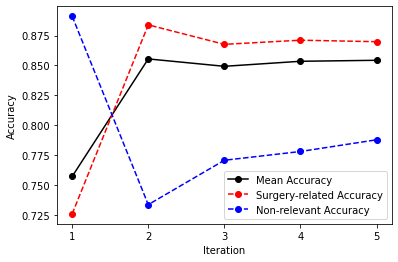

In [19]:
x = [1,2,3,4,5]
plt.plot(x,mean_li,marker='o',color='black',label='Mean Accuracy')
plt.plot(x,on_li,marker='o',color='red',ls='--',label='Surgery-related Accuracy')
plt.plot(x,off_li,marker='o',color='blue',ls='--',label='Non-relevant Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(x,x)
plt.legend()

In [3]:
torch.cuda.is_available()

True

In [2]:
print(torch.cuda.device_count())

2


([<matplotlib.axis.XTick at 0x7f037a2151c0>,
  ...],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
 

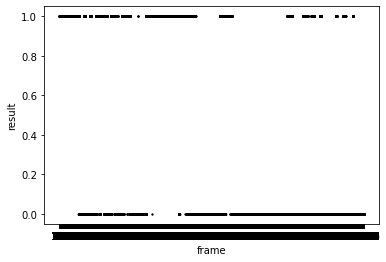

In [17]:
x = list(range(len(true)))
plt.scatter(x,preds_bin,marker='o',color='black',s=0.1)
plt.xlabel('frame')
plt.ylabel('result')
plt.xticks(x,x)


([<matplotlib.axis.XTick at 0x7f0355f3feb0>,
  ...],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
 

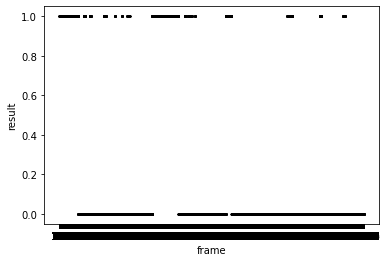

In [19]:
x = list(range(len(true)))
plt.scatter(x,true,marker='o',color='black',s=1)
plt.xlabel('frame')
plt.ylabel('result')
plt.xticks(x,x)
